In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [33]:
# df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data.csv', index_col=[0])
df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data-outliers-trimmed.csv', index_col=[0])

In [34]:
features = df.drop(columns=['id', 'name', 'pr_points'], axis=1)
target = df[['pr_points']]

In [35]:
numeric_features = features.drop(columns=['language'], axis=1)
categorical_features = features[['language']].copy()
numeric_features.head()

,pull_requests,size,contributors,age,contributor_xp
Unnamed: 0,,,,,
0,18,16027,11,2331,1.261
0,119,13363,191,1843,1.683
0,853,9617,172,1860,4.373
0,146,3076,178,811,4.323
0,131,6671,53,1879,3.617


In [36]:
scaler = StandardScaler()
standardized_features = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)
standardized_features.describe()

,pull_requests,size,contributors,age,contributor_xp
count,1.059000e+03,1.059000e+03,1.059000e+03,1.059000e+03,1.059000e+03
mean,1.677391e-17,4.445086e-17,-5.367651e-17,1.258043e-16,1.509652e-16
std,1.000472e+00,1.000472e+00,1.000472e+00,1.000472e+00,1.000472e+00
min,-7.918696e-01,-9.064134e-01,-9.798733e-01,-1.813919e+00,-1.640238e+00
25%,-6.565662e-01,-7.497062e-01,-7.201006e-01,-7.927153e-01,-7.499647e-01
50%,-3.777592e-01,-3.999306e-01,-3.658650e-01,-7.290589e-02,-2.186260e-01
75%,2.270059e-01,4.234142e-01,3.307982e-01,6.915232e-01,5.278165e-01
max,5.477187e+00,3.376855e+00,3.577957e+00,2.769289e+00,3.752127e+00


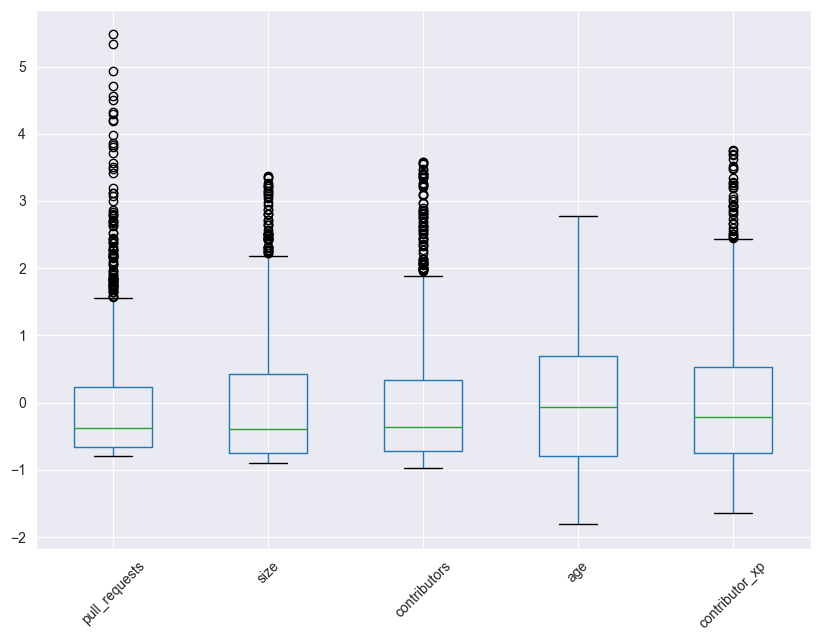

In [37]:
standardized_features.boxplot(figsize=(10, 7), rot=45)
plt.show()

In [38]:
categorical_features = pd.get_dummies(categorical_features, columns=['language'], dtype=int)
categorical_features.head()

,language_C,language_C#,language_C++,language_CSS,language_CoffeeScript,language_Dart,language_Dockerfile,language_Elixir,language_Go,language_Groovy,...,language_SCSS,language_Shell,language_Swift,language_TeX,language_TypeScript,language_Vim Script,language_Vim Snippet,language_Vim script,language_Visual Basic .NET,language_Vue
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
processed_data = pd.concat([standardized_features, categorical_features, target], axis=1, sort=False)
processed_data.head()

,pull_requests,size,contributors,age,contributor_xp,language_C,language_C#,language_C++,language_CSS,language_CoffeeScript,...,language_Shell,language_Swift,language_TeX,language_TypeScript,language_Vim Script,language_Vim Snippet,language_Vim script,language_Visual Basic .NET,language_Vue,pr_points
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,-0.722168,0.565136,-0.861795,0.148509,-1.151599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0623
0,-0.308057,0.320215,1.263619,-0.262329,-0.880632,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.9500
0,2.701418,-0.024183,1.039269,-0.248017,0.846620,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.4270
0,-0.197355,-0.625545,1.110116,-1.131152,0.814515,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.8380
0,-0.258856,-0.295030,-0.365865,-0.232022,0.361191,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.1460


In [40]:
processed_data.to_csv('/Users/yelderiny/Projects/Dissertation/Data/processed-data-outliers-trimmed.csv', index=False)